# Time series plots
The next cell attaches the times new roman font.

You can install the font with 
```{bash}
sudo apt install ttf-times-new-roman
```

Check that it is installed with 

```{bash}
fc-list | grep "Times New Roman"
```

Make sure matplotlib can see it with:

```{python}
import matplotlib
matplotlib.font_manager.findSystemFonts()
```

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font file path
font_path = '/usr/share/fonts/truetype/msttcorefonts/times.ttf'

# Create a FontProperties object using the font file path
font_props = FontProperties(fname=font_path)

In [1]:
import pandas as pd
import dateparser

shoot=pd.read_csv('gun_data/raw/motherjones.csv')
shootings=[]
alphamax=0
for i,row in shoot.iterrows():
    if row['total_victims']!='TK':
        shootings.append([dateparser.parse(row['date']),int(row['total_victims']), row['location'].split(',')[0]])
        alphamax=max(alphamax,shootings[-1][1])

244129131.0
155374.0
225141.0
(2922,)


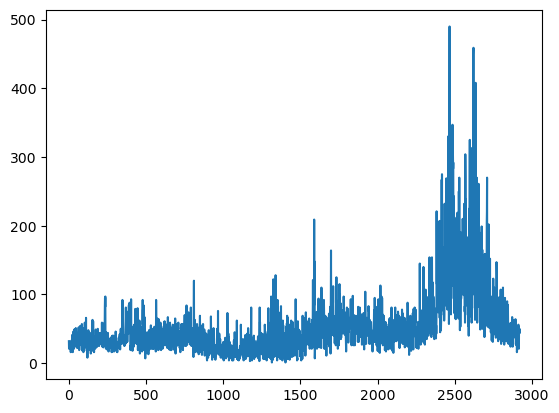

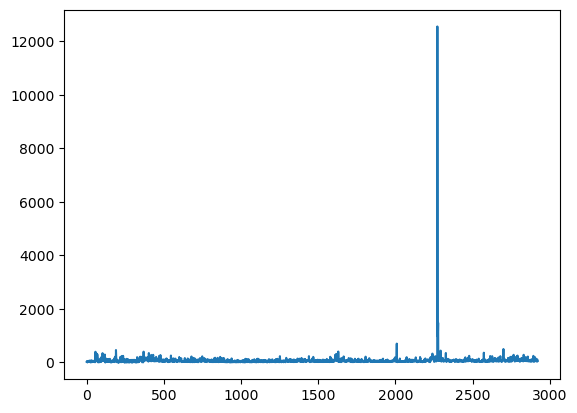

366


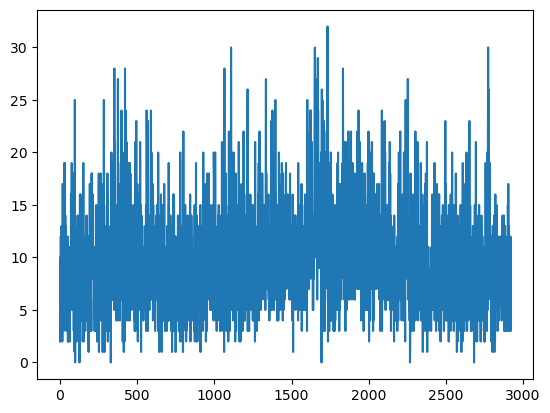

In [2]:
import numpy as np
import matplotlib.pyplot as plt
gun=np.loadtxt('gun_data/raw/gun_count_daily_total.np')
antireg=np.loadtxt('gun_data_additional/raw/users_count_daily_antireg_2.np')
proreg=np.loadtxt('gun_data_additional/raw/users_count_daily_proreg_2.np')
print(gun[:2922].sum())
print(antireg[:2922].sum())
print(proreg[:2922].sum())
print(antireg.shape)
plt.plot(antireg[:2922])
plt.show()
plt.plot(proreg[:2922])
plt.show()
medr=np.loadtxt('gun_data/raw/media_regulation.np')[:]
meds=np.loadtxt('gun_data/raw/media_shootings.np')[:]
medv=np.loadtxt('gun_data/raw/media_violence.np')
nics=np.loadtxt('gun_data/raw/background_checks_daily.np')
days_in_month_reg=[31,28,31,30,31,30,31,31,30,31,30,31]
days_in_month_leap=[31,29,31,30,31,30,31,31,30,31,30,31]
print(sum(days_in_month_leap))
plt.plot(medv[:2922])
plt.show()

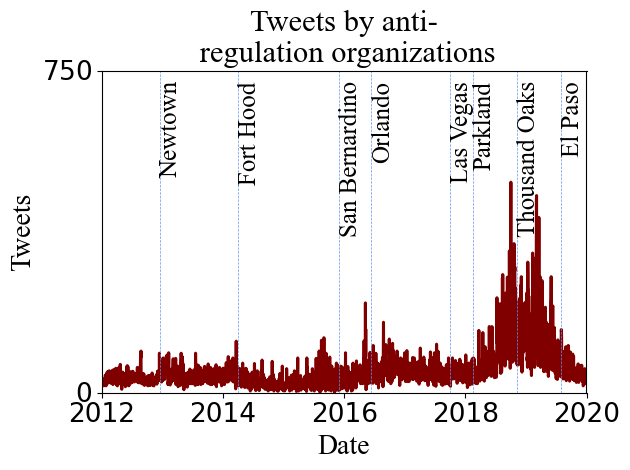

In [123]:
plt.figure()
from datetime import timedelta as td
import datetime

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font file path
font_path = '/usr/share/fonts/truetype/msttcorefonts/times.ttf'

# Create a FontProperties object using the font file path
font_props = FontProperties(fname=font_path)

T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T[:2922],antireg[:2922],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Tweets',fontsize=20,fontproperties=font_props) 
#plt.title('Tweets by anti-\n regulation organizations',fontsize=30,fontproperties=font_props)
ax=plt.gca()
title_props = font_props.copy()
title_props.set_size(22)
ax.set_title('Tweets by anti-\n regulation organizations', fontproperties=title_props)
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ticks=ax.get_xticks()[1:-1:2]
ticklabels=ax.get_xticklabels()[1:-1:2]
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,750])
ax.set_yticks([0,750],r'$0$,$750$'.split(','), fontproperties=font_props)
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=1)

            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 25,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')#, fontproperties=font_props)

plt.tight_layout()
plt.savefig('figs/antireg.pdf',bbox_inches='tight')
plt.savefig('figs/antireg.png',bbox_inches='tight')

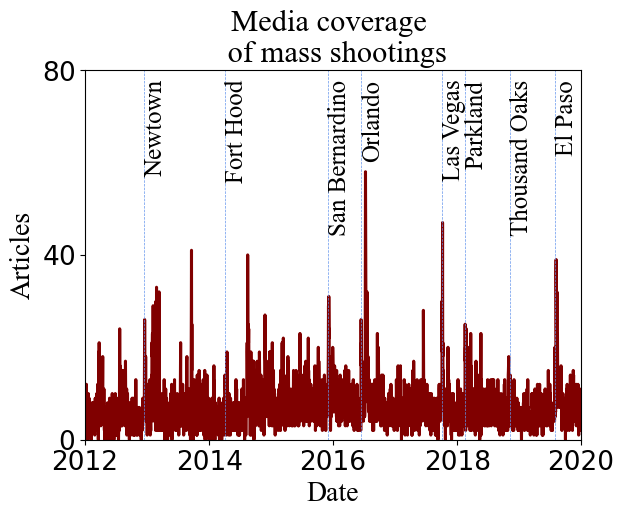

In [125]:
plt.figure()
from datetime import timedelta as td
T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T[:-1],meds[:len(T)-1],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Articles', fontsize=20, fontproperties=font_props)
title_props = font_props.copy()
title_props.set_size(22)
plt.title('Media coverage \n of mass shootings', fontproperties=title_props)
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,80])
ax.set_yticks([0,40,80],r'$0$,$40$,$80$'.split(','))

indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=1)
            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 2,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')
            
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
#plt.tight_layout()
plt.savefig('figs/media_shootings.pdf',bbox_inches='tight')
plt.savefig('figs/media_shootings.png',bbox_inches='tight')

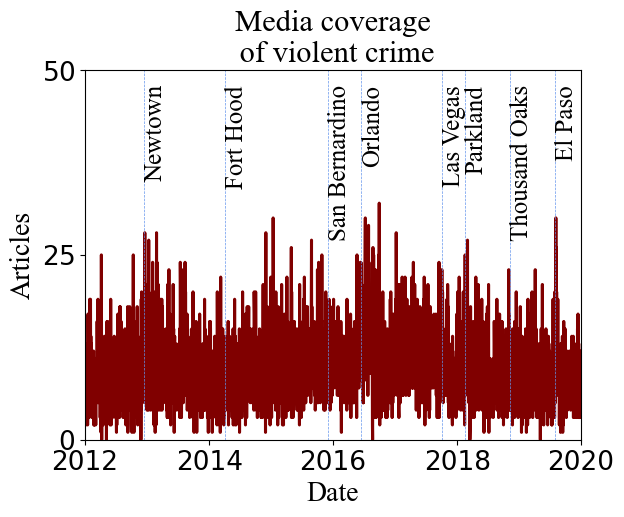

In [126]:
plt.figure()
from datetime import timedelta as td
T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T[:-1],medv[:len(T)-1],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Articles', fontsize=20, fontproperties=font_props)
plt.title('Media coverage\n of violent crime', fontproperties=title_props)
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,50])
ax.set_yticks([0,25,50],r'$0$,$25$,$50$'.split(','))

indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=1)

            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 2,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')

ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
#plt.tight_layout()
plt.savefig('figs/media_violent.pdf',bbox_inches='tight')
plt.savefig('figs/media_violent.png',bbox_inches='tight')

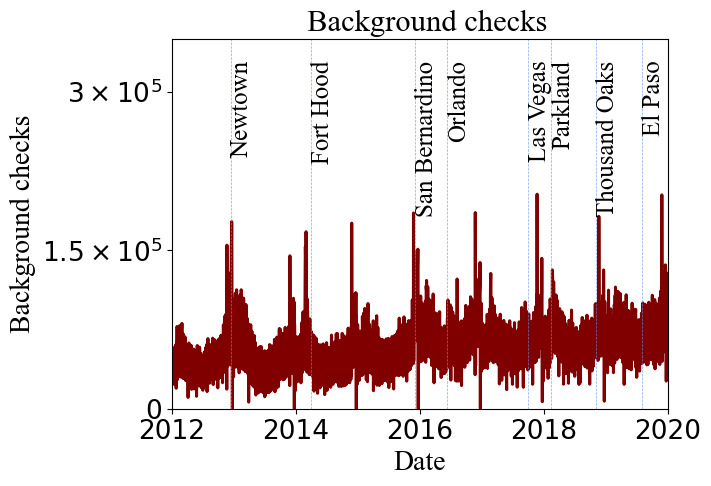

In [131]:
plt.figure()
T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T,nics[:len(T)],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Background checks', fontsize=20, fontproperties=font_props),
plt.title('  Background checks', fontproperties=title_props)
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,350000])
ax.set_yticks([0,150000,300000],r'$0$,$1.5 \times 10^5$,$3 \times 10^5$'.split(','))

indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=0.8)
            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 2 * 10**4,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')
            
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
#plt.tight_layout()
plt.savefig('figs/nics.pdf',bbox_inches='tight')
plt.savefig('figs/nics.png',bbox_inches='tight')

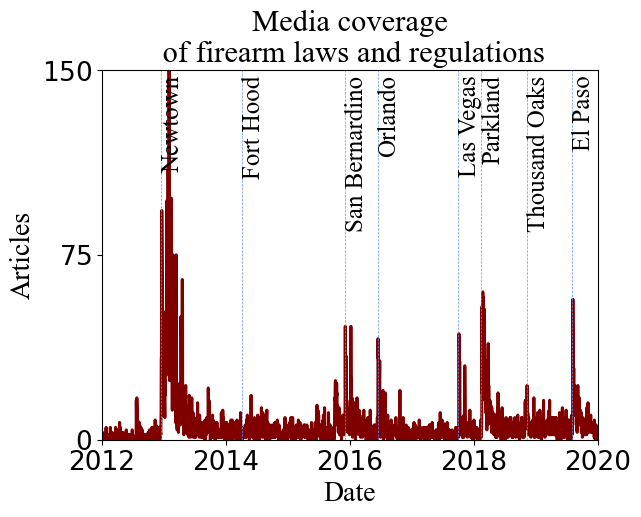

In [133]:
plt.figure()
T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T[:-1],medr[:len(T)-1],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Articles', fontsize=20, fontproperties=font_props)
plt.title('Media coverage\n of firearm laws and regulations', fontproperties=title_props)
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,150])
ax.set_yticks([0,75,150],r'$0$,$75$,$150$'.split(','))

indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=1)
            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 2,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')
            
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
#plt.tight_layout()
plt.savefig('figs/media_reg.pdf',bbox_inches='tight')
plt.savefig('figs/media_reg.png',bbox_inches='tight')

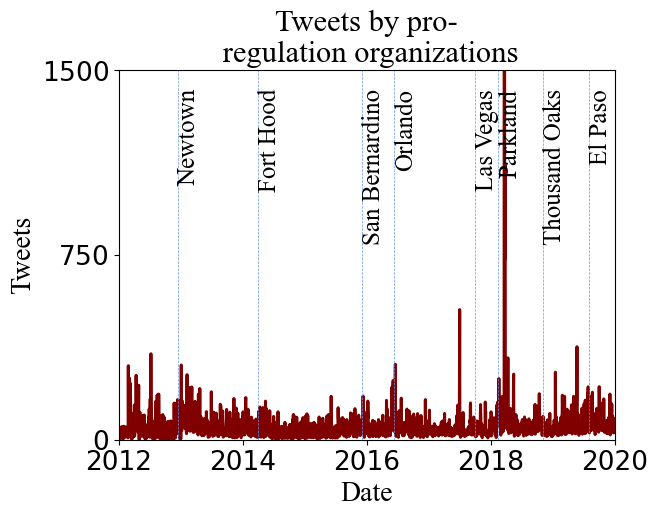

In [137]:
plt.figure()
T=pd.date_range('2012-01-01T00:00:00','2020-01-01T00:00:00',freq='24H')
plt.plot(T[:2922],proreg[:2922],'maroon', linewidth=2.2)
plt.xlabel('Date', fontsize=20, fontproperties=font_props)
plt.ylabel('Tweets', fontsize=20, fontproperties=font_props) 
plt.title('Tweets by pro-\n regulation organizations', fontproperties=title_props)
ax=plt.gca()
ax.set_xticks(ax.get_xticks()[1::2],ax.get_xticklabels()[1::2])
ax.set_xlim([T.min(),T.max()])
ax.set_ylim([0,2000])
ax.set_yticks([0,1000,2000],r'$0$,$750$,$1500$'.split(','))
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)
indent=0
shoot0=T.min()
for shoot in shootings[::-1]:
    out=False
    if shoot[1]>0.09*alphamax and shoot[0]>T.min() and shoot[0]<T.max():
        out=True
    tclose=np.where(T-shoot[0]<=td(days=3))[0]
    if len(tclose)==0:
        continue
    if gun[tclose].max()>np.median(gun)+1e5:
        if shoot[0]>T.min() and shoot[0]<T.max() and shoot[1]>10:
            out=True
    if shoot[2] in 'Newtown,Fort Hood,San Bernardino,Orlando,Las Vegas,Parkland,Thousand Oaks,El Paso'.split(','):
            if shoot[2]=='Orlando' and shoot[0]>datetime.datetime(2017,1,1):
                continue
            
            plt.plot([shoot[0],shoot[0]],[0,ax.get_ylim()[1]],'cornflowerblue',linestyle='dashed',linewidth=0.5,alpha=1)
            ax.text(
                shoot[0],
                ax.get_ylim()[1] - 100,
                shoot[2],
                rotation=90, alpha=1, fontsize=18, font='Times New Roman', verticalalignment='top')
            
#plt.tight_layout()
plt.savefig('figs/proreg.pdf',bbox_inches='tight')
plt.savefig('figs/proreg.png',bbox_inches='tight')

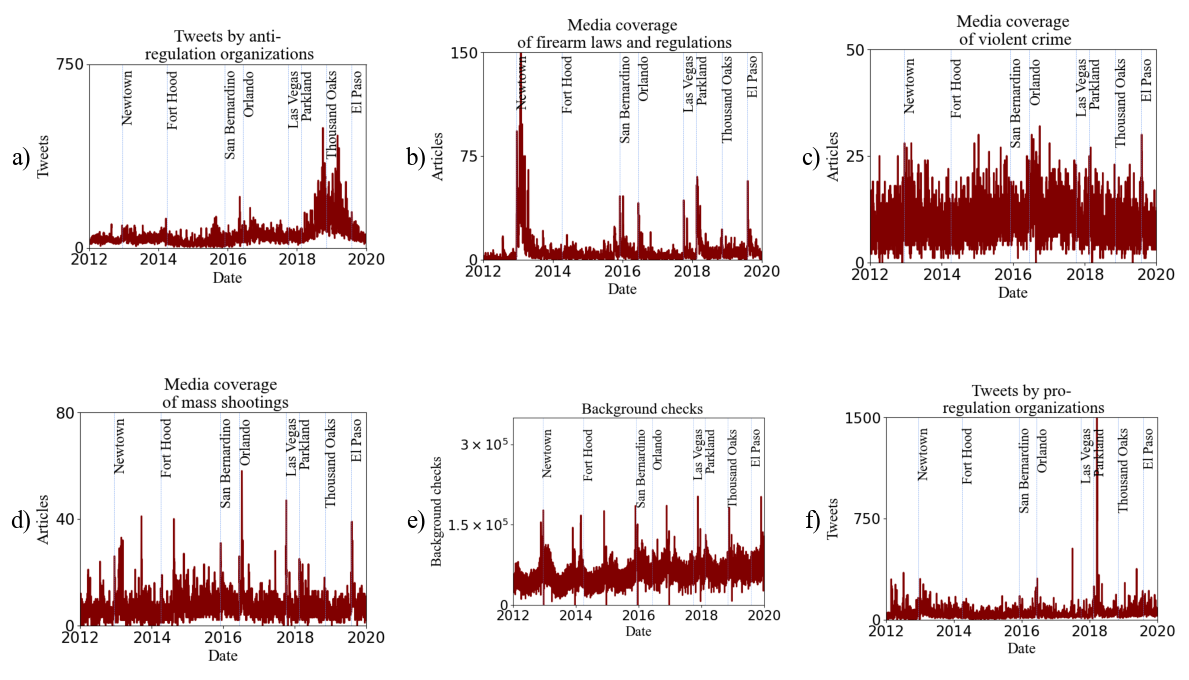

In [173]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

png_files = [
    "figs/antireg.png", "figs/media_reg.png",
    "figs/media_violent.png","figs/media_shootings.png",
    "figs/nics.png", "figs/proreg.png"
]

# Create a larger figure with a 3x4 aspect ratio (you can adjust the values as needed)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Increase the figsize as per your preference

# Labels for subplots
labels = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']

# Loop through PNG files and labels, and add them to subplots
for i, (png_file, label) in enumerate(zip(png_files, labels)):
    row = i // 3  # Determine the row (0 or 1)
    col = i % 3   # Determine the column (0, 1, or 2)

    # Read the PNG image
    img = imread(png_file)

    # Add the image to the subplot
    axes[row, col].imshow(img)

    # Add the label to the left of the subplot
    axes[row, col].text(0, 0.5, label, fontsize=18, fontproperties=font_props, transform=axes[row, col].transAxes, va='center', ha='right')

    # Remove the axes
    axes[row, col].axis('off')

# Adjust layout
plt.tight_layout()

#plt.tight_layout()
#plt.savefig('figs/combined.pdf',bbox_inches='tight')
#plt.savefig('figs/combined.png',bbox_inches='tight')
plt.show()

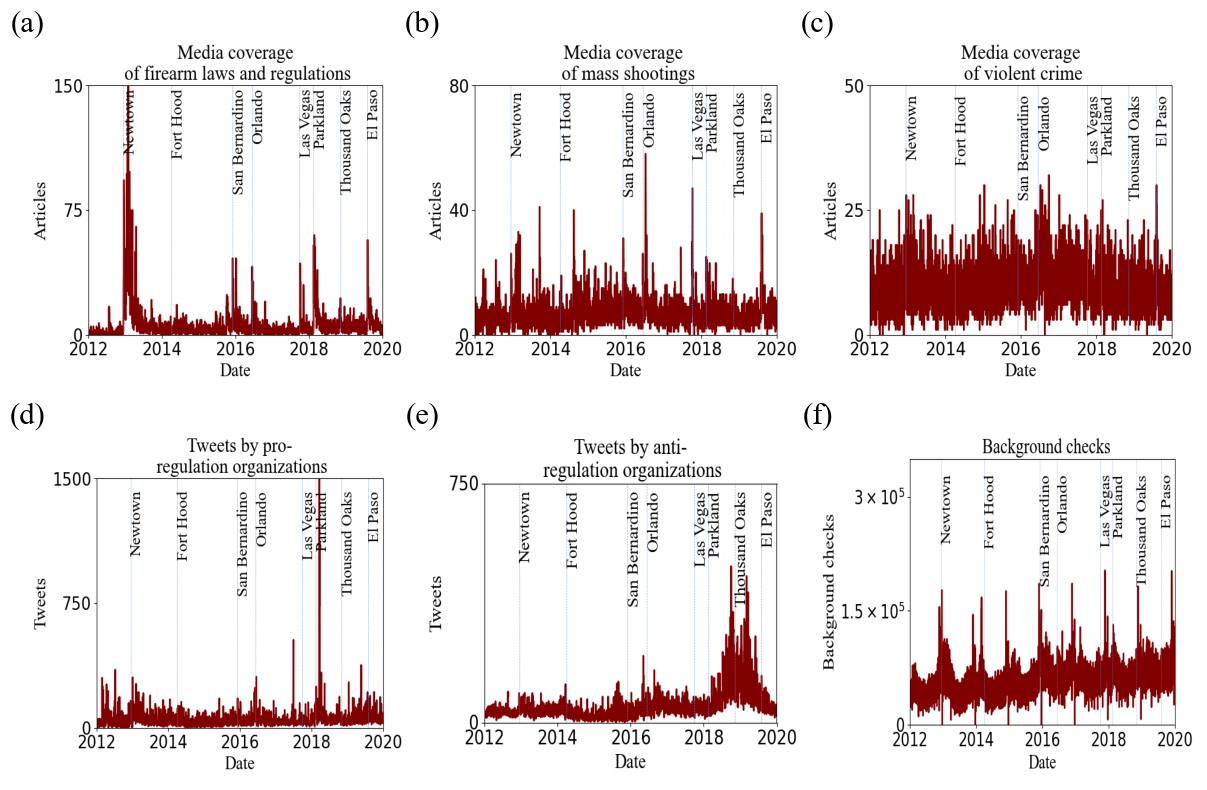

In [190]:

png_files = [
    "figs/media_reg.png",
    "figs/media_shootings.png",
    "figs/media_violent.png",
    "figs/proreg.png",
    "figs/antireg.png",
    "figs/nics.png",
    
]

# Create a larger figure with a 2x3 aspect ratio (you can adjust the values as needed)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
# Loop through PNG files
for i, png_file in enumerate(png_files):
    row = i // 3  # Determine the row (0 or 1)
    col = i % 3   # Determine the column (0, 1, or 2)

    # Read the PNG image
    img = imread(png_file)

    # Add the image to the subplot
    axes[row, col].imshow(img, aspect='auto')

    # Add the label above the subplot
    title = axes[row, col].set_title(f'{labels[i]}', fontproperties=title_props)

    # Move the title two inches to the left
    title.set_position((title.get_position()[0] - 0.5, title.get_position()[1]))

    # Remove the axes
    axes[row, col].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('figs/combined.pdf',bbox_inches='tight')
plt.savefig('figs/combined.png',bbox_inches='tight')